In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, 
                                      shuffle=True, random_state=42)

In [8]:
# 创建数据集DataFrame
data = pd.DataFrame({
    'text': newsgroups_train.data,
    'target': newsgroups_train.target,
    'target_names': [newsgroups_train.target_names[i] for i in newsgroups_train.target]
})
print(f'数据集大小：{len(data)}')
print(f"数据集前5行：\n{data.head()}")
print(f"类别数量：{len(newsgroups_train.target_names)}")

数据集大小：2257
数据集前5行：
                                                text  target  \
0  From: sd345@city.ac.uk (Michael Collier)\nSubj...       1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\...       1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson)\nSu...       3   
3  From: s0612596@let.rug.nl (M.M. Zwart)\nSubjec...       3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...       3   

             target_names  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
类别数量：4


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [7]:
texts=data['text']
vectorizer=TfidfVectorizer(max_features=1000,stop_words='english')
X=vectorizer.fit_transform(texts)

In [9]:
n_cluster=4
kmeans = KMeans(n_clusters=n_cluster)
cluster_labels = kmeans.fit_predict(X)


In [11]:
silhouette_avg=silhouette_score(X,cluster_labels)
print(f"聚类的数量为{n_cluster}时，轮廓系数为{silhouette_avg:.3f}")

聚类的数量为4时，轮廓系数为0.021


In [15]:
data['cluster']=kmeans.labels_
print("聚类结果")
for i in range(n_cluster):
    print("第%d类"%i)
    cluster_texts=data[data['cluster']==i]['text'].head(2)
    for text in cluster_texts[:3]:
        print(f"    {text}")



聚类结果
第0类
    From: keith@cco.caltech.edu (Keith Allan Schneider)
Subject: Re: Keith Schneider - Stealth Poster?
Organization: California Institute of Technology, Pasadena
Lines: 25
NNTP-Posting-Host: punisher.caltech.edu

arromdee@jyusenkyou.cs.jhu.edu (Ken Arromdee) writes:

>>But, if you were to discuss the merits of racism, or its psycholgical
>>benefits, you would do well to have experienced it personally.
>When you speak of "experiencing religion" you mean someone should believe in
>a religion.

That's right, and this is pretty impossible, right?  It would be ideal if
we could believe for a while, just to try out religion, and only then
determine which course of thought suits us best.  But again, this is not
possible.  Not that religion warrants belief, but the belief carries with
it some psychological benefits.  There are also some psychological
burdens, too.

>When you speak of "experiencing racism", do you mean that someone should
>believe in racism, or that they should have ra

数据集大小: 2257
类别名称: ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']
聚类结果:

簇 0 中的文档数量: 116
簇 0 中的示例文本:
  - From: keith@cco.caltech.edu (Keith Allan Schneider)
Subject: Re: Keith Schneider - Stealth Poster?
Organization: California Institute of Technology, Pasadena
Lines: 25
NNTP-Posting-Host: punisher.calt...
  - From: keith@cco.caltech.edu (Keith Allan Schneider)
Subject: Re: <Political Atheists?
Organization: California Institute of Technology, Pasadena
Lines: 20
NNTP-Posting-Host: punisher.caltech.edu

live...

簇 1 中的文档数量: 740
簇 1 中的示例文本:
  - From: djohnson@cs.ucsd.edu (Darin Johnson)
Subject: Re: harrassed at work, could use some prayers
Organization: =CSE Dept., U.C. San Diego
Lines: 63

(Well, I'll email also, but this may apply to othe...
  - From: s0612596@let.rug.nl (M.M. Zwart)
Subject: catholic church poland
Organization: Faculteit der Letteren, Rijksuniversiteit Groningen, NL
Lines: 10

Hello,

I'm writing a paper on the role of the c...

簇 2 中的文档数量: 131

/Applications/app_for_code/miniconda3/envs/nlp/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31532 (\N{CJK UNIFIED IDEOGRAPH-7B2C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Applications/app_for_code/miniconda3/envs/nlp/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Applications/app_for_code/miniconda3/envs/nlp/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Applications/app_for_code/miniconda3/envs/nlp/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Applications/app_for_code/minic

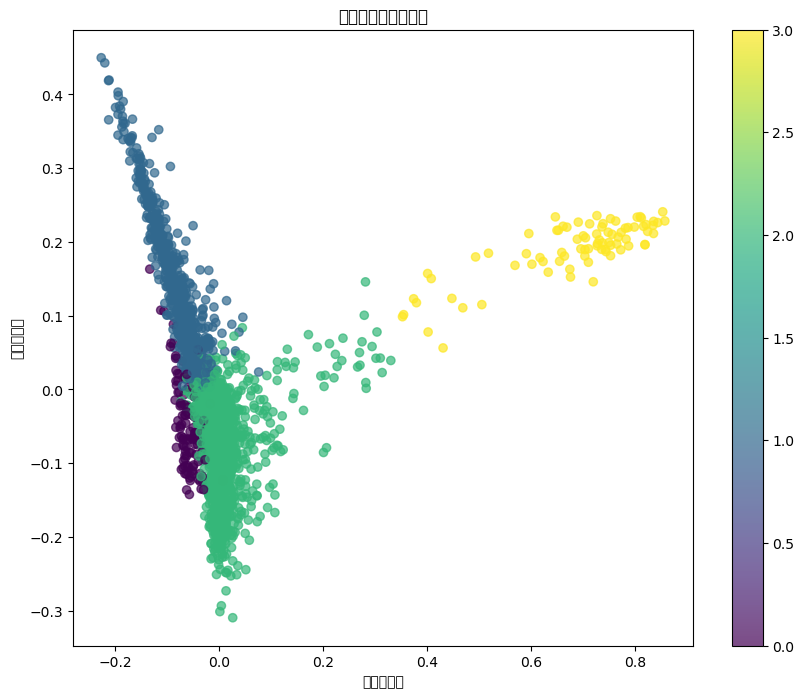


每个簇的关键词:
簇 0 的前10个关键词:
  keith
  caltech
  livesey
  sgi
  solntze
  wpd
  schneider
  jon
  cco
  allan

簇 1 的前10个关键词:
  god
  jesus
  people
  bible
  christian
  believe
  christians
  church
  think
  don

簇 2 的前10个关键词:
  com
  university
  posting
  host
  graphics
  nntp
  article
  thanks
  know
  ca

簇 3 的前10个关键词:
  pitt
  geb
  banks
  gordon
  cs
  dsl
  shameful
  cadre
  surrender
  n3jxp

真实类别分布:
target_names
soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: count, dtype: int64

聚类结果分布:
cluster
2    1319
1     740
0     116
3      82
Name: count, dtype: int64


In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 获取20 Newsgroups数据集
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, 
                                      shuffle=True, random_state=42)

# 创建数据集DataFrame
data = pd.DataFrame({
    'text': newsgroups_train.data,
    'target': newsgroups_train.target,
    'target_names': [newsgroups_train.target_names[i] for i in newsgroups_train.target]
})

print(f"数据集大小: {len(data)}")
print(f"类别名称: {newsgroups_train.target_names}")

# 文本向量化（TF-IDF）
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english', max_df=0.5, min_df=2)
X = vectorizer.fit_transform(data['text'])

# 执行K-means聚类
n_clusters = 4
# 修正：创建KMeans对象并命名为kmeans（而不是cluster）
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(X)

# 修正：使用kmeans.labels_而不是cluster.labels
data['cluster'] = kmeans.labels_

print("聚类结果:")
for i in range(n_clusters):
    print(f"\n簇 {i} 中的文档数量: {sum(data['cluster'] == i)}")
    print(f"簇 {i} 中的示例文本:")
    sample_texts = data[data['cluster'] == i]['text'].head(2)
    for idx, text in sample_texts.items():
        # 只显示前200个字符以避免输出过长
        print(f"  - {text[:200]}...")

# 评估聚类效果
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, data['cluster'])
print(f"\n平均轮廓系数: {silhouette_avg:.3f}")

# 可视化聚类结果
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['cluster'], cmap='viridis', alpha=0.7)
plt.title('文本聚类结果可视化')
plt.xlabel('第一主成分')
plt.ylabel('第二主成分')
plt.colorbar(scatter)
plt.show()

# 显示每个簇的关键词
feature_names = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

print("\n每个簇的关键词:")
for i in range(n_clusters):
    print(f"簇 {i} 的前10个关键词:")
    for ind in order_centroids[i, :10]:
        print(f"  {feature_names[ind]}")
    print()

# 比较真实标签和聚类结果
print("真实类别分布:")
print(data['target_names'].value_counts())

print("\n聚类结果分布:")
print(data['cluster'].value_counts())